In [2]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'ALL_10') # data to read in ALL_10, or MELA
Rocket.load_probeset_data(); 
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [58]:
METHOD_LIST = ['ensemble'] # 
Runs = []
nruns = 5
SCALER = "standard" # None, minmax, standard, normaliser, add robust?
SCALER_MAXABS = False # scale by maximum absolute values
SCALER_BIAS_REMOVAL = True
GROUPING = "mean"
FEAT_SELECTOR =  None # low_variance" # "low_variance" None
SELECTOR_METHOD = "FDR" # mannwhitney, FDR
SCORE_FUNC = 'ANOVA' # ANOVA, chi2
SELECTOR_ALPHA = 0.05 # see this as the maximum p-value to classify 
DIM_TYPE =  None # "PCA" #"LDA", "PCA", "PLS" 
DIM_NUM = None
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
Rocket.DATA_merged_processed = None

In [62]:
PREPROC_DICT = {"patient_grouping": GROUPING, "bias_removal": SCALER_BIAS_REMOVAL, "noise": True, 
                "noise_level": 0.05}
FSELECT_DICT = {"type": FEAT_SELECTOR, "pvalue": SELECTOR_ALPHA, 
                "method": SELECTOR_METHOD, "score_function": SCORE_FUNC}
DIMRED_DICT = {"type": DIM_TYPE, "n_comp": DIM_NUM}
PIPELINE = {"scaler": {"type": SCALER, "maxabs": SCALER_MAXABS},
            "ensemble": {"voting": 'hard'},
            "pre_processing": PREPROC_DICT,
            "feature_selection": FSELECT_DICT, # mannwhitney         
            "dim_reduction": DIMRED_DICT}
Rocket.PIPELINE_PARAMETERS = PIPELINE

In [63]:
Rocket.X_GENOME = None
Rocket.Y_CLASS = None
Rocket.PREP_HASH = None
Rocket.n_jobs = 16
RUNS, MODELS, ACC = Rocket.run_classification(method_list = METHOD_LIST, 
                          num_run = nruns,
                          pipeline = PIPELINE,
                          parameters = {}, 
                          features = 'genomic')

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Adding 0.05 noise
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (57, 54613) and class vector (57,)
MODEL: SVM accuracy:  0.7192982456140351 +/-: 0.02620386692408853
MODEL: RandomForest accuracy:  0.7543859649122807 +/-: 0.02407034332242088
MODEL: MLNN accuracy:  0.5614035087719298 +/-: 0.006463527239150505
MODEL: GNB accuracy:  0.6140350877192983 +/-: 0.021153361873583486


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

MODEL: Ensembled accuracy:  0.6491228070175439 +/-: 0.014445004057192429


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
Process ForkPoolWorker-6658:
Process ForkPoolWorker-6661:
Process ForkPoolWorker-6672:
Process ForkPoolWorker-6662:
Process ForkPoolWorker-6668:
Process ForkPoolWorker-6671:
Process ForkPoolWorker-6669:
Process ForkPoolWorker-6657:
Process ForkPoolWorker-6663:
Process ForkPoolWorker-6666:
Process ForkPoolWorker-6660:
Process ForkPoolWorker-6667:
Process ForkPoolWorker-6665:
Process ForkPoolWorker-6670:
Process ForkPoolWorker-6664:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (m

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-a07373f52803>", line 9, in <module>
    features = 'genomic')
  File "/home/koekiemonster/DEV/GIT/RexR/functions/get_predictors.py", line 56, in run_classification
    pipeline = pipeline)
  File "/home/koekiemonster/DEV/GIT/RexR/functions/get_predictors.py", line 350, in classify_treatment
    model.fit(x, y)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/voting_classifier.py", line 189, in fit
    for clf in clfs if clf is not None)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 789, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 699, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/usr/lib/python3.6/multip

KeyboardInterrupt: 

In [54]:
ACC.acc.mean()

0.9859649122807017

In [5]:
RenSemble = Rocket.Ensemble(weighted=False, 
                            use_accuracy=False, 
                            use_uncertainty=False,
                            cross_validation=True,
                            folds=10,
                            SEED=1234,
                            sample_weights=None,
                            training_viz=False)

In [6]:
RenSemble._add_untrained_models(models=MODELS)

RenSemble.fit(Rocket.X_GENOME, Rocket.Y_CLASS)

NameError: name 'MODELS' is not defined

NameError: name 'RenSemble' is not defined

## Post-processing

In [ ]:
processed_df = _helpers._preprocess(Rocket.DATA_merged, cohorts = ["cohort 1", "cohort 2", "JB", "IA", "ALL-10"], 
                                      scaler = SCALER , Rclass = Rocket)

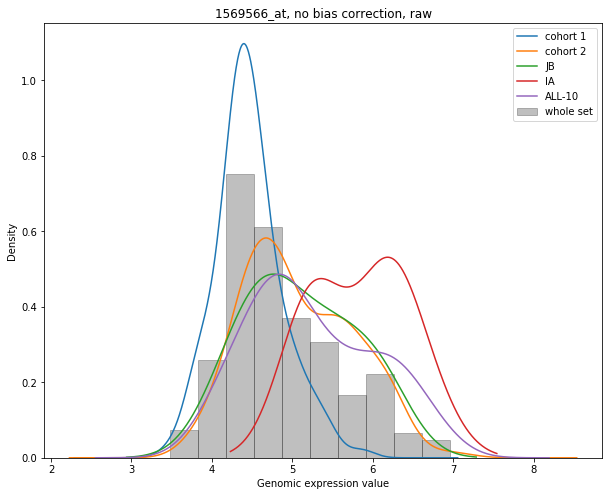

In [228]:
# array-batch

plt.figure(figsize=(10,8))
ch = Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])

#Rocket.DATA_merged.loc[ch,'1569566_at'].plot.kde(color = 'blue')
Rocket.DATA_merged.loc[ch,'1569566_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='cohort 1']['1569566_at'].plot.kde(label='cohort 1')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='cohort 2']['1569566_at'].plot.kde(label='cohort 2')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='JB']['1569566_at'].plot.kde(label='JB')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='IA']['1569566_at'].plot.kde(label='IA')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='ALL-10']['1569566_at'].plot.kde(label='ALL-10')
plt.title('1569566_at, no bias correction, raw')
plt.xlabel('Genomic expression value')
plt.legend()
#plt.savefig('out/genome_distribution_noCorrection_noNormalisation.png', 
#                            format='png', dpi=600, transparant=True)



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


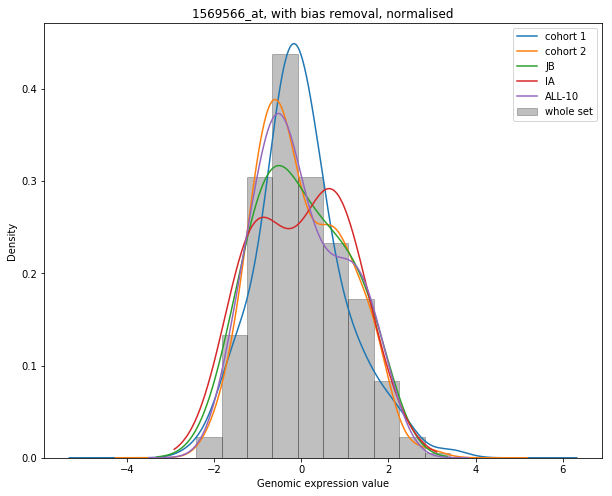

In [16]:
plt.figure(figsize=(10,8))
ch = processed_df["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])
#processed_df.loc[ch, '1569566_at'].plot.kde(label='whole set')
processed_df.loc[ch, '1569566_at'].plot.hist(label='whole set', alpha=0.25, 
                                                 density=True, color='black', ec='black')
processed_df.ix[processed_df['array-batch']=='cohort 1']['1569566_at'].plot.kde(label='cohort 1')
processed_df.ix[processed_df['array-batch']=='cohort 2']['1569566_at'].plot.kde(label='cohort 2')
processed_df.ix[processed_df['array-batch']=='JB']['1569566_at'].plot.kde(label='JB')
processed_df.ix[processed_df['array-batch']=='IA']['1569566_at'].plot.kde(label='IA')
processed_df.ix[processed_df['array-batch']=='ALL-10']['1569566_at'].plot.kde(label='ALL-10')
plt.title('1569566_at, with bias removal, normalised')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/strong_genome_distribution_withCorrection_standardNormalisation.png', 
                format='png', dpi=600, transparant=True)

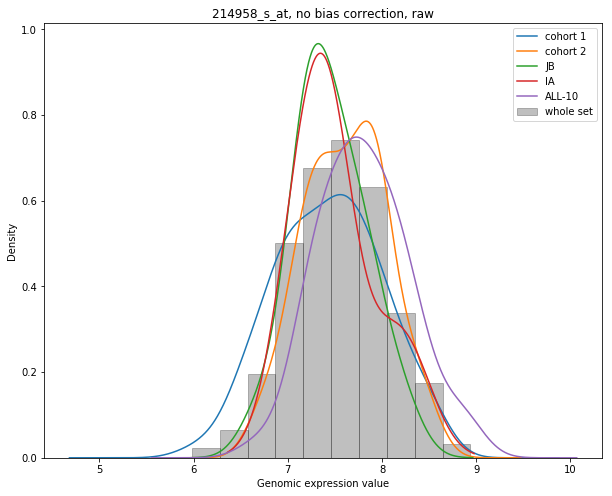

In [229]:
plt.figure(figsize=(10,8))
ch = Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])

#Rocket.DATA_merged.loc[ch, '214958_s_at'].plot.kde(label='whole set')
Rocket.DATA_merged.loc[ch,'214958_s_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='cohort 1']['214958_s_at'].plot.kde(label='cohort 1')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='cohort 2']['214958_s_at'].plot.kde(label='cohort 2')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='JB']['214958_s_at'].plot.kde(label='JB')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='IA']['214958_s_at'].plot.kde(label='IA')
Rocket.DATA_merged.loc[Rocket.DATA_merged['array-batch']=='ALL-10']['214958_s_at'].plot.kde(label='ALL-10')
#Rocket.DATA_merged['200934_at'].plot.kde(label='200934_at')
#Rocket.DATA_merged['207908_at'].plot.kde(label='207908_at')
#Rocket.DATA_merged['205107_s_at'].plot.kde(label='205107_s_at')
#Rocket.DATA_merged['243806_at'].plot.kde(label='243806_at')
plt.title('214958_s_at, no bias correction, raw')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/weak_genome_distribution_noCorrection_noNormalisation.png', 
                            format='png', dpi=600, transparant=True)

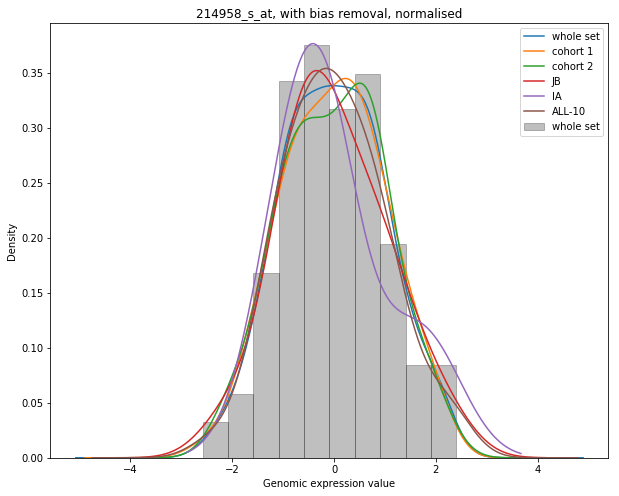

In [233]:
plt.figure(figsize=(10,8))
ch = processed_df["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])

processed_df.loc[ch, '214958_s_at'].plot.kde(label='whole set')
processed_df.loc[ch,'214958_s_at'].plot.hist(label='whole set', alpha=0.25, 
                                                        density=True, color='black', ec='black')
processed_df.loc[processed_df['array-batch']=='cohort 1']['214958_s_at'].plot.kde(label='cohort 1')
processed_df.loc[processed_df['array-batch']=='cohort 2']['214958_s_at'].plot.kde(label='cohort 2')
processed_df.loc[processed_df['array-batch']=='JB']['214958_s_at'].plot.kde(label='JB')
processed_df.loc[processed_df['array-batch']=='IA']['214958_s_at'].plot.kde(label='IA')
processed_df.loc[processed_df['array-batch']=='ALL-10']['214958_s_at'].plot.kde(label='ALL-10')
#Rocket.DATA_merged['200934_at'].plot.kde(label='200934_at')
#Rocket.DATA_merged['207908_at'].plot.kde(label='207908_at')
#Rocket.DATA_merged['205107_s_at'].plot.kde(label='205107_s_at')
#Rocket.DATA_merged['243806_at'].plot.kde(label='243806_at')
plt.title('214958_s_at, with bias removal, normalised')
plt.xlabel('Genomic expression value')
plt.legend()
plt.savefig('out/weak_genome_distribution_withCorrection_standardNormalisation.png', 
                            format='png', dpi=600, transparant=True)

In [18]:
Rocket.X_test.shape

(272, 456)

In [ ]:
MODELS[0]

<Figure size 720x576 with 0 Axes>

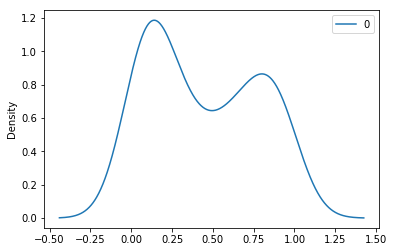

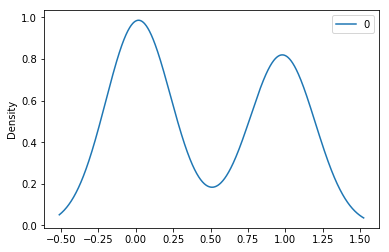

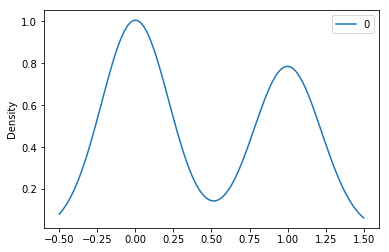

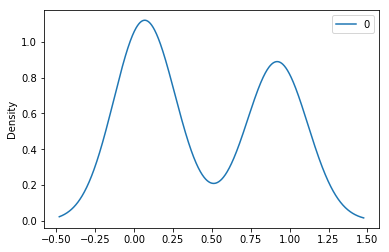

In [34]:
def ensemble_prediction(models, x, weighted = False, plot_certainty = False):
    preds = []
    if plot_certainty == True:
        plt.figure(figsize=(10,8))
    for MODEL in models:
        if MODEL['method']=='RVM':
            _pred = 1 - np.reshape(np.dot(x, MODEL['model'].wInferred), newshape=[len(x),])/2+0.5
            if(plot_certainty == True):
                pd.DataFrame(_pred).plot.kde(label='RVM')
        elif MODEL['method']=='DNN':
            _pred = 1 - MODEL['model'].predict_on_batch(np.array(x))[:,0] 
            if(plot_certainty == True):
                pd.DataFrame(_pred).plot.kde(label='DNN')            
        elif MODEL['method']=='CNN':
            _pred = 1 - MODEL['model'].predict(np.expand_dims(x, axis=2))[:,0]
            if(plot_certainty == True):
                pd.DataFrame(_pred).plot.kde(label='CNN')
        elif MODEL['method'].lower() in ['lgbm', 'lightgbm']:
            _pred = 1 - MODEL['model'].predict_proba(x)[:,0]
            if(plot_certainty == True):
                pd.DataFrame(_pred).plot.kde(label='LGBM')            
        else:
            _pred = 1 - MODEL['model'].predict_proba(x)[:,0]
            if(plot_certainty == True):
                try:
                    pd.DataFrame(_pred).plot.kde(label=MODEL['method'])
                except:
                    continue
        
        preds.append(_pred)
    if weighted == False:
        _preds = sum(preds)/len(preds)
        if(plot_certainty == True):
            try:
                pd.DataFrame(_preds).plot.kde(label="Ensemble")
            except Exception as e:
                print(e)  
        plt.legend()
        return _preds
    else:
        pd_list = [] 
        for idx, _pred in enumerate(preds):
            df = pd.DataFrame(data=_pred, columns=['proba'])
            df['id'] = df.index
            df['acc'] = MODELS[idx]['accuracy'][0]['acc']
            pd_list.append(df)
        dfconcat = pd.concat(pd_list)
        dfconcat['weight'] = 2*(dfconcat['proba'] - 0.5).abs()*dfconcat['acc']
        _preds = dfconcat.groupby(by='id').apply(lambda x: (x.weight*x.proba).sum()/x.weight.sum())\
                                                                                    .reset_index()
        if(plot_certainty == True):
            try:
                pd.DataFrame(_preds).plot.kde(label="Ensemble")
            except Exception as e:
                print(e)         
        plt.legend()
        return _preds
        
    # weighted either by overall accuracy of by prediction certainty

        
        
_preds_uw = pd.DataFrame(ensemble_prediction(MODELS, Rocket.X_GENOME, weighted = False, plot_certainty = True))

In [22]:
1-abs(np.round(_preds)-Rocket.Y_CLASS).sum()/Rocket.Y_CLASS.shape[0]

1.0

In [90]:
MODELS[8]['accuracy'][0]['model']

'DNN'

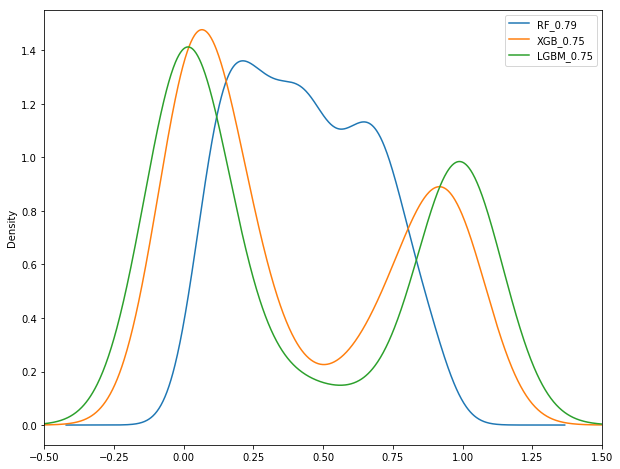

In [6]:
plt.figure(figsize=(10,8))
RUNS[0].loc[RUNS[0].method=='RF']['pred'].plot.kde(label='RF_'+'{:01.2f}'.format(MODELS[0]['accuracy'][0]['acc']))
RUNS[0].loc[RUNS[0].method=='XGB']['pred'].plot.kde(label='XGB_'+'{:01.2f}'.format(MODELS[1]['accuracy'][0]['acc']))
RUNS[0].loc[RUNS[0].method=='LGBM']['pred'].plot.kde(label='LGBM_'+'{:01.2f}'.format(MODELS[2]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='ExtraTrees']['pred'].plot.kde(label='ET_'+'{:01.2f}'.format(MODELS[3]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='SVM']['pred'].plot.kde(label='SVM_'+'{:01.2f}'.format(MODELS[4]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='LR']['pred'].plot.kde(label='LR_'+'{:01.2f}'.format(MODELS[5]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='NaiveBayes']['pred'].plot.kde(label='NaiveBayes_'+'{:01.2f}'.format(MODELS[6]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='DNN']['pred'].plot.kde(label='DNN_'+'{:01.2f}'.format(MODELS[8]['accuracy'][0]['acc']))
#RUNS[0].loc[RUNS[0].method=='CNN']['pred'].plot.kde(label='CNN_'+'{:01.2f}'.format(MODELS[9]['accuracy'][0]['acc']))
plt.xlim(-.5,1.5)
plt.legend()

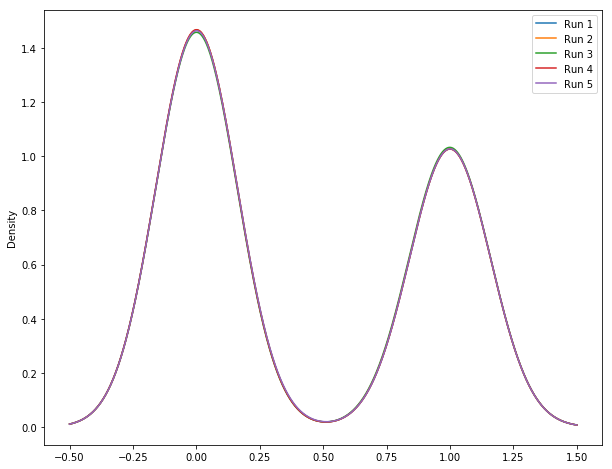

In [239]:
plt.figure(figsize=(10,8))
RUNS[0].loc[RUNS[0].method=='NaiveBayes']['pred'].plot.kde(label='Run 1')
RUNS[1].loc[RUNS[1].method=='NaiveBayes']['pred'].plot.kde(label='Run 2')
RUNS[2].loc[RUNS[2].method=='NaiveBayes']['pred'].plot.kde(label='Run 3')
RUNS[3].loc[RUNS[3].method=='NaiveBayes']['pred'].plot.kde(label='Run 4')
RUNS[4].loc[RUNS[4].method=='NaiveBayes']['pred'].plot.kde(label='Run 5')
plt.legend()

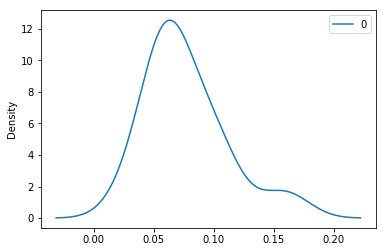

In [216]:
pd.DataFrame(MODELS[3]['model'].feature_importances_).plot.kde()

In [6]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()

for idx, df in enumerate(RUNS):    
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df[Rocket.MODEL_PARAMETERS['ID']] = final_df[Rocket.MODEL_PARAMETERS['ID']].astype(str)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df_agg = final_df_agg['pred'].groupby(by=Rocket.MODEL_PARAMETERS['ID']).agg({'mean': [numpy.mean, numpy.median, numpy.std]})['mean']
#final_df.to_csv("out/patient_results_"+Rocket.SET_NAME+"_FDR0025.csv")
#final_df_agg.to_csv("out/patient_results_agg_"+Rocket.SET_NAME+"_FDR0025.csv")

# Top genomes

In [269]:
top_weights, top_coeffs = _helpers.get_top_genes(MODELS=MODELS, n_max=30, sort_by = 'MEDIAN', RexR=Rocket)

In [105]:
top_coeffs.to_csv("out/coeffs_"+Rocket.SET_NAME+"_RAW_N500_noise005.csv")
top_weights.to_csv("out/weights_"+Rocket.SET_NAME+"_RAW_N500_noise005.csv")

In [258]:
top_weights

,0_RF,1_XGB,2_LGBM,3_ExtraTrees,10_RF,11_XGB,12_LGBM,13_ExtraTrees,20_RF,21_XGB,...,80_RF,81_XGB,82_LGBM,83_ExtraTrees,90_RF,91_XGB,92_LGBM,93_ExtraTrees,MEAN,MEDIAN
1569566_at,0.655528,1.000000,0.8,0.989502,1.000000,0.296875,0.50,0.272690,0.701222,0.628571,...,0.708527,0.478261,1.000000,0.781315,1.000000,0.647059,0.8,0.572932,0.745486,0.777778
223748_at,0.489733,0.138889,1.0,0.000000,0.525714,0.062500,0.75,0.366654,0.497624,0.028571,...,0.468385,0.130435,0.666667,0.436289,0.618353,0.058824,0.6,0.630792,0.412316,0.468385
1553450_s_at,0.179223,0.805556,0.4,0.111831,0.373798,0.421875,1.00,0.000000,0.213031,0.571429,...,0.148780,1.000000,0.000000,0.000000,0.159185,1.000000,0.4,0.120087,0.355391,0.314828
209930_s_at,0.816896,0.111111,0.6,0.242217,0.493812,0.093750,0.50,0.676102,0.642473,0.228571,...,0.595792,0.021739,0.166667,0.234938,0.916159,0.205882,0.2,0.376296,0.346040,0.279842
201015_s_at,0.657436,0.194444,0.2,0.961106,0.766305,0.171875,0.00,0.891245,0.714895,0.142857,...,0.403158,0.282609,0.000000,0.254321,0.639489,0.264706,0.0,0.102583,0.343278,0.254321
228667_at,1.000000,0.138889,0.2,0.273212,0.344192,0.062500,0.25,0.005665,0.852974,0.000000,...,0.895468,0.260870,0.166667,0.284143,0.723201,0.205882,0.2,0.935896,0.326043,0.250000
223017_at,0.210886,0.166667,0.2,0.435056,0.513278,0.093750,0.50,0.318008,0.376738,0.285714,...,0.313489,0.108696,0.333333,0.994466,0.255770,0.235294,0.6,1.000000,0.266512,0.200000
1556224_a_at,0.134921,0.055556,0.2,0.707389,0.326945,0.109375,0.25,0.176323,0.269913,0.142857,...,0.181402,0.000000,0.333333,0.177603,0.262095,0.117647,0.2,0.207329,0.207744,0.177603
221870_at,0.175507,0.083333,0.8,0.095773,0.037621,0.000000,0.00,0.295162,0.212716,0.057143,...,0.157225,0.239130,0.666667,0.854609,0.029660,0.029412,1.0,0.440186,0.304382,0.175507
206923_at,0.252603,0.027778,0.2,0.391507,0.417624,0.015625,0.00,0.000000,0.237845,0.028571,...,0.266919,0.000000,0.166667,0.432476,0.210077,0.000000,0.0,0.000000,0.159915,0.166667


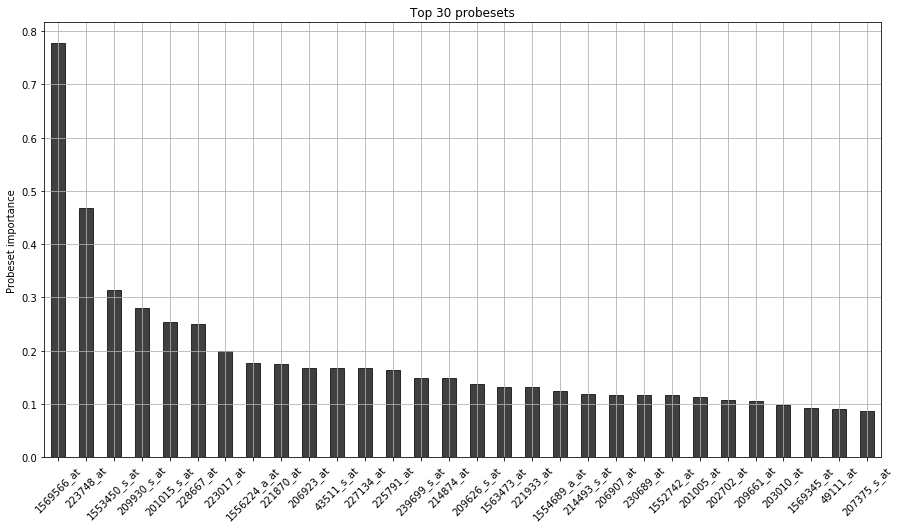

In [270]:
plt.figure(figsize=(15,8))
top_weights.MEDIAN.plot(kind = 'bar', alpha=0.75, color='black', ec='black')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel("Probeset importance")
plt.title("Top 30 probesets")
plt.savefig('out/top30_importances_FDR005.png', format='png', dpi=600, transparant=True)

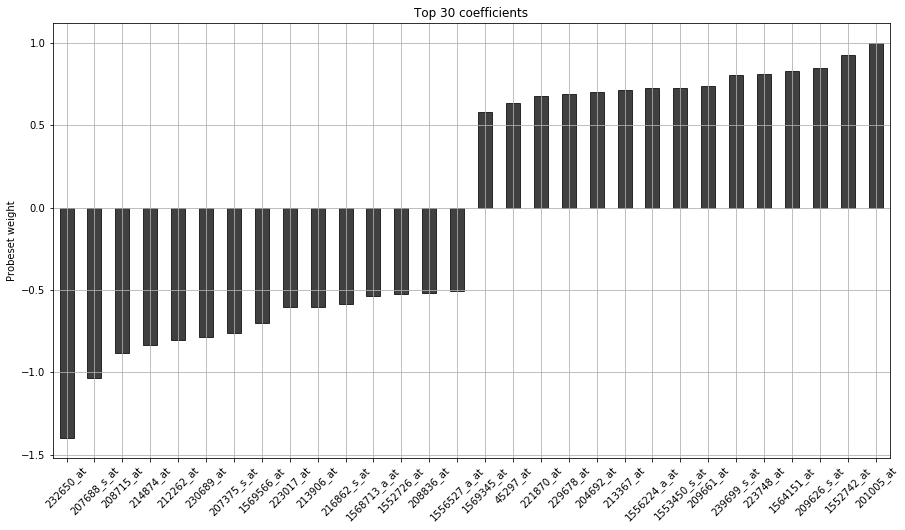

In [272]:
plt.figure(figsize=(15,8))
top_coeffs.MEAN.plot(kind = 'bar', alpha=0.75, color='black', ec='black')
plt.grid(True)
plt.ylabel("Probeset weight")
plt.title("Top 30 coefficients")
plt.xticks(rotation=45)
plt.savefig('out/top30_weights_FDR005.png', format='png', dpi=600, transparant=True)

In [144]:
top_weights['MEAN_RF'] = top_weights[['0_RF', '10_RF', '20_RF', '30_RF', '40_RF']].apply(lambda x: np.mean(x), axis=1)
top_weights['MEDIAN_RF'] = top_weights[['0_RF', '10_RF', '20_RF', '30_RF', '40_RF']].apply(lambda x: np.median(x), axis=1)

top_weights['MEAN_XGB'] = top_weights[['1_XGB', '11_XGB', '21_XGB', '31_XGB', '41_XGB']].apply(lambda x: np.mean(x), axis=1)
top_weights['MEDIAN_XGB'] = top_weights[['1_XGB', '11_XGB', '21_XGB', '31_XGB', '41_XGB']].apply(lambda x: np.median(x), axis=1)

top_weights['MEAN_LGBM'] = top_weights[['2_LGBM', '12_LGBM', '22_LGBM', '32_LGBM', '42_LGBM']].apply(lambda x: np.mean(x), axis=1)
top_weights['MEDIAN_LGBM'] = top_weights[['2_LGBM', '12_LGBM', '22_LGBM', '32_LGBM', '42_LGBM']].apply(lambda x: np.median(x), axis=1)

top_weights['MEAN_ET'] = top_weights[['3_ExtraTrees', '13_ExtraTrees', '23_ExtraTrees', '33_ExtraTrees', '43_ExtraTrees']].apply(lambda x: np.mean(x), axis=1)
top_weights['MEDIAN_ET'] = top_weights[['3_ExtraTrees', '13_ExtraTrees', '23_ExtraTrees', '33_ExtraTrees', '43_ExtraTrees']].apply(lambda x: np.median(x), axis=1)


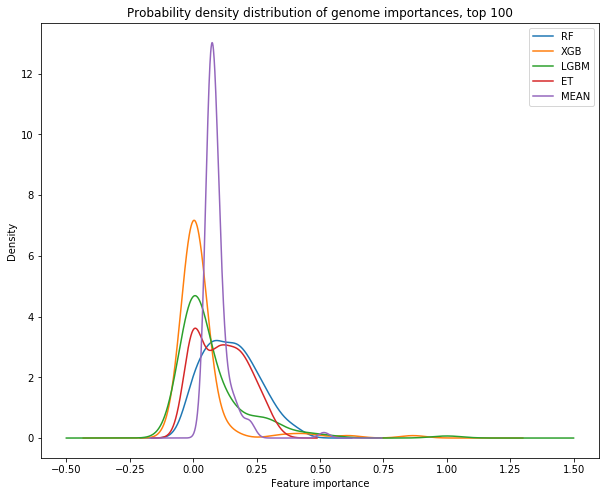

In [145]:
plt.figure(figsize=(10,8))
top_weights.MEAN_RF.plot.kde(label='RF')
top_weights.MEAN_XGB.plot.kde(label='XGB')
top_weights.MEAN_LGBM.plot.kde(label='LGBM')
top_weights.MEAN_ET.plot.kde(label='ET')
top_weights.MEAN.plot.kde(label='MEAN')
plt.title("Probability density distribution of genome importances, top 100")
plt.xlabel("Feature importance")
plt.legend()
plt.savefig('out/genome_importances_distribution_top100.png', 
                            format='png', dpi=600, transparant=True)

In [179]:
top_coeffs.loc[top_coeffs.MEAN.abs()>0.8]

,49_SVM,49_LR,MEAN,MEDIAN
232650_at,-0.877242,-0.954474,-0.915858,-0.915858
239458_at,-0.839766,-0.948832,-0.894299,-0.894299
217511_at,-0.834752,-0.906680,-0.870716,-0.870716
1569566_at,-0.800196,-0.884886,-0.842541,-0.842541
227828_s_at,-0.820628,-0.835663,-0.828145,-0.828145
208715_at,-0.786184,-0.850828,-0.818506,-0.818506
225109_at,-0.824504,-0.806771,-0.815637,-0.815637
229228_at,-0.770386,-0.832448,-0.801417,-0.801417
201005_at,0.818543,0.856799,0.837671,0.837671
1567023_at,1.000000,1.000000,1.000000,1.000000


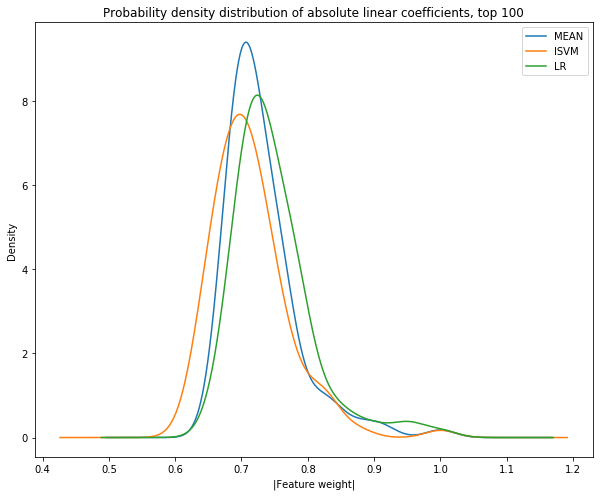

In [162]:
plt.figure(figsize=(10,8))
top_coeffs.MEAN.abs().plot.kde(label='MEAN')
top_coeffs['49_SVM'].abs().plot.kde(label='lSVM')
top_coeffs['49_LR'].abs().plot.kde(label='LR')
plt.title("Probability density distribution of absolute linear coefficients, top 100")
plt.xlabel("|Feature weight|")
plt.legend()
plt.savefig('out/genome_coeffs_distribution_top100.png', 
                            format='png', dpi=600, transparant=True)

## Connecting probesets to genomes

In [18]:
probe_list = top_weights.index.tolist()
probeset_col = 'Probe Set ID'
desc_list = ['Pathway','Gene Title', 'Gene Symbol', 'Chromosomal Location', 
             'EC', 'gene ontology biological process', 'gene ontology molecular function']
probeset_to_genome_map = _helpers._probeset_mapper(probeset_type = 'HG-U133',                                                    
                                                   mapping_file = None,
                                                   probeset_col = probeset_col,
                                                   description_list = desc_list,
                                                   probe_list = probe_list)


_helpers._probeset_mapper took 2.82 seconds to finish


In [19]:
probeset_to_genome_map

{'1569566_at': {'AGI': '---',
  'Alignments': 'chr4:37892744-37954428 (+) // 68.11 // p14',
  'Annotation Date': '30-Mar-16',
  'Annotation Description': 'This probe set was annotated using the Matching Probes based pipeline to a Entrez Gene identifier using 2 transcripts. // false // Matching Probes // A',
  'Annotation Notes': 'XR_945684 // refseq // 5 // Cross Hyb Matching Probes /// XR_945685 // refseq // 5 // Cross Hyb Matching Probes /// XR_925212 // refseq // 3 // Cross Hyb Matching Probes /// XR_925213 // refseq // 3 // Cross Hyb Matching Probes',
  'Annotation Transcript Cluster': 'ENST00000402522(9),OTTHUMT00000317444(9)',
  'Archival UniGene Cluster': 'Hs.203722',
  'Chromosomal Location': 'chr4p14',
  'EC': '---',
  'Ensembl': 'ENSG00000065882 /// OTTHUMG00000150302',
  'Entrez Gene': '23216',
  'FlyBase': '---',
  'Gene Ontology Biological Process': '0032880 // regulation of protein localization // inferred from electronic annotation /// 0043547 // positive regulation of G

In [20]:
mapping_data = pd.read_csv('_data/genomic_data/mapping-data/HG-U133_Plus_2.na36annot.txt',
                           usecols = ['Pathway',
                                      'Gene Title', 
                                      'Gene Symbol',
                                      'Gene Ontology Biological Process'], sep='\t')

In [25]:
mapping_data.loc[mapping_data['Gene Symbol']=='NRAS']

,Gene Title,Gene Symbol,Gene Ontology Biological Process,Pathway
12095,neuroblastoma RAS viral (v-ras) oncogene homolog,NRAS,0000165 // MAPK cascade // traceable author st...,G_Protein_Signaling // GenMAPP /// MAPK_Cascad...
34243,neuroblastoma RAS viral (v-ras) oncogene homolog,NRAS,0000165 // MAPK cascade // traceable author st...,G_Protein_Signaling // GenMAPP /// MAPK_Cascad...


# Visualise the top genomes

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

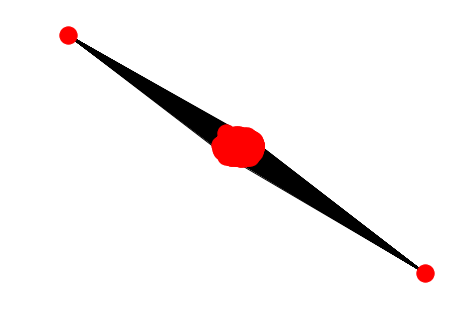

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 